In [1]:
!pip install -q sentence-transformers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
data = data.dropna()
documents = data['text'].tolist()
print(f"Loaded {len(documents)} documents.")

Loaded 18846 documents.


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(documents, show_progress_bar=True)
print(f"Generated embeddings with shape: {embeddings.shape}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

Generated embeddings with shape: (18846, 384)


In [5]:
num_clusters = 20

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

data['Cluster'] = labels
print(data.head())

                                                text  target  Cluster
0  \n\nI am sure some bashers of Pens fans are pr...      10       18
1  My brother is in the market for a high-perform...       3       10
2  \n\n\n\n\tFinally you said what you dream abou...      17       12
3  \nThink!\n\nIt's the SCSI card doing the DMA t...       3       17
4  1)    I have an old Jasmine drive which I cann...       4       17


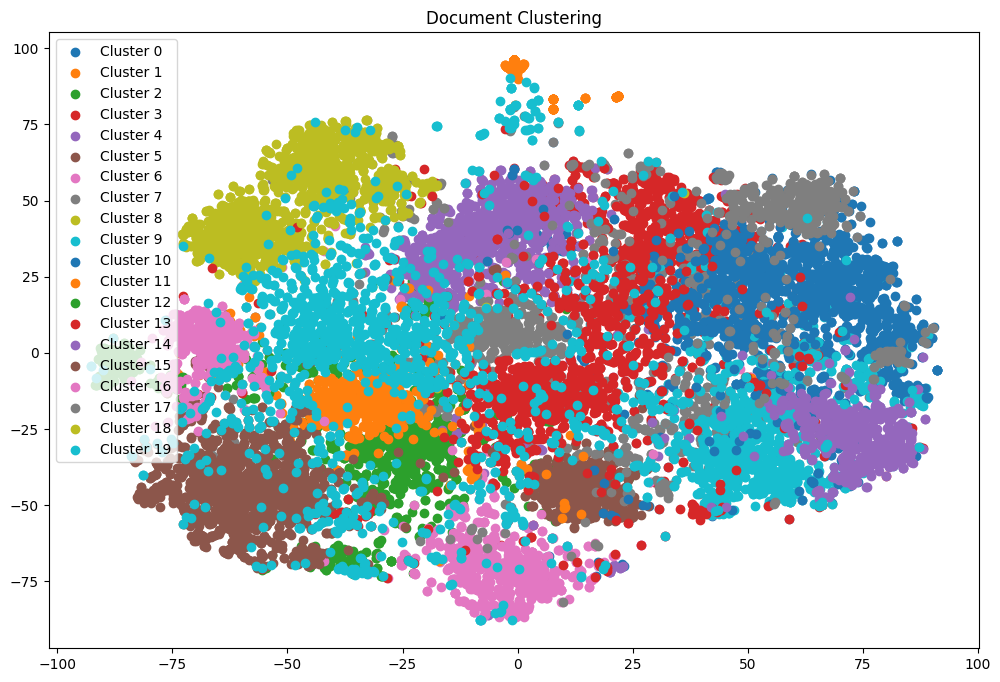

In [6]:
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
for cluster in np.unique(labels):
    cluster_points = reduced_embeddings[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.legend()
plt.title("Document Clustering")
plt.show()

In [7]:
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    cluster_docs = data[data['Cluster'] == cluster_id]['text'].head(3).tolist()
    for doc in cluster_docs:
        print(f"  - {doc[:200]}...")
    print("\n")

Cluster 0:
  - completed

Why would you dispose a channel if you are going to play more
sounds soon? If you are trying to write a game, you shouldn't
be using SndPlay. Instead, make a channel and use BufferCmds
to p...
  - From article <1993Apr25.201129.1239@Princeton.EDU>, by fuchs@tsar.princeton.edu (Ira H. Fuchs):
 generally,  the corrosion is a signal that it's time to send them
 of to the recyclers, but if you're t...
  - [discussing the use of IRQ 7]



To put it a little differently:

 - IRQ 7 is the de facto standard interrupt assigned to be used by the
   printer adapter to announce its completion of some activity....


Cluster 1:
  - ...
  - ...
  - ...


Cluster 2:
  - 
The Supreme Court seems to disagree with you -- they have stated that
"the people" is a term of art refering to an individual right, and
have explicitly mentioned the second amendment as an example.
...
  - 	In what way David?  Our government is totally out of control,
	whether you realize it or not.  I know 

In [8]:
score = silhouette_score(embeddings, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.05562049522995949
